In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

# Random matrix properties

In [2]:
# random matrix ensembles

def complex_ginibre_matrix(N,var):
    """
    randomly draw a complex ginibre matrix

    Args:
        N (int): matrix size
        var (float): variance of an individual entry (usually var=1/N)

    Returns:
        NxN-np.array
    """
    real_part = np.random.normal(0,np.sqrt(var),size=(N, N))
    imag_part = np.random.normal(0,np.sqrt(var),size=(N, N))
    A = (real_part + 1j * imag_part)/np.sqrt(2)
    return A

def real_ginibre_matrix(N,var):
    """
    randomly draw a complex ginibre matrix

    Args:
        N (int): matrix size
        var (float): variance of an individual entry (usually var=1/N)

    Returns:
        NxN-np.array
    """
    return np.random.normal(0,np.sqrt(var),size=(N, N))

def real_ginibre_moments(N,order):
    if order % 2 ==1:
        return 0
    else:
        p = order//2
        moment = 1
        for i in range(p):
            moment *= (N + 2 * (i+1) - 2)/N
        return moment

def gue_matrix(N,var):
    """
    randomly draw a sample from the gaussian unitary ensemble

    Args:
        N (int): matrix size
        var (float): variance of an individual entry (usually var=1/N)

    Returns:
        NxN-np.array
    """
    real_part = np.random.normal(0,np.sqrt(var),size=(N, N))
    imag_part = np.random.normal(0,np.sqrt(var),size=(N, N))
    A = (real_part + 1j * imag_part)/np.sqrt(2)
    H = (A + A.conj().T)/np.sqrt(2)  # Create Hermitian matrix with proper normalization
    return H

def goe_matrix(N,var):
    """
    randomly draw a sample from the gaussian orthogonal ensemble

    Args:
        N (int): matrix size
        var (float): variance of an individual entry (usually var=1/N)

    Returns:
        NxN-np.array
    """
    A = np.random.normal(0,np.sqrt(var),size=(N, N))
    H = (A + A.conj().T)/np.sqrt(2)  # Create symmeytric matrix with proper normalization
    return H

def random_mode_model(N,M,Gamma,Overlap,return_K=False):
    """
    randomly draw a random-mode-model connectivity matrix

    Args:
        N (int): matrix size
        M (int): rank (or number of modes)
        Gamma (M-array): Diagonal components
        Overlap (M-array): Overlap between left and right modes

    Returns:
        NxN-array
    """
    L = np.zeros((N,M))
    R = np.zeros((N,M))
    for a in range(M):
        cov = 1/N * np.array([[1,Overlap[a]],[Overlap[a],1]])
        param = np.random.multivariate_normal(np.zeros(2),cov,size=N)
        L[:,a]=param[:,0]
        R[:,a]=param[:,1]
    if return_K:
        return np.diag(np.sqrt(Gamma)) @ R.T @ L @ np.diag(np.sqrt(Gamma))
    else:
        return L @ np.diag(Gamma) @ R.T

In [3]:
# generic functions

def moment(random_matrix_generator, N,oder):
    samples = 100
    m = 0
    for n in range(samples):
        A = random_matrix_generator(N)
        m +=  np.trace(np.linalg.matrix_power(A,oder)) / samples
    return m

def plot_spectrum(random_matrix_generator, N,samples=10, normalized=False):
    """plots the spectrum of a given random matrix ensemble

    Args:
        random_matrix_generator (function): 
        N (int): matrix size
        samples (int, optional): number of samples to average over. Defaults to 10.
        normalized (bool, optional): plot the normalized density, i.e. spectrum devided by the mean eigenvalue. Defaults to False.
    """
    evals = []
    for n in range(samples):
        A = random_matrix_generator(N)
        if np.allclose(A,A.T.conj()) or np.allclose(A,A.T):
            ev=np.linalg.eigvalsh(A)
        else: 
            ev=np.linalg.eigvals(A)
        evals.append(ev)
    evals = np.array(evals).flatten()

    evals = evals[np.abs(np.real(evals))>1e-5] #clip zeros

    # plt.figure(figsize=(6, 6))
    # plt.scatter(np.real(evals),np.imag(evals),s=0.5)
    # plt.xlabel('real')
    # plt.ylabel('imag')
    # plt.show()

    if normalized:
        plt.hist(np.real(evals)/np.real(np.mean(evals)),bins=50,density=True)
        plt.xlabel('real(eigenvalue)/mean(eigenvalues)')
    else:
        plt.hist(np.real(evals),bins=50,density=True)
        plt.xlabel('real(eigenvalue)')
    plt.ylabel('probability density')
    plt.annotate(f'mean: {np.mean(evals):.3f}\n std dev: {np.std(evals):.3f}',xy=(1,0.2),ha='center')
    plt.show()
    return

def plot_singular_values(random_matrix_generator, N,samples=10):
    """plots the singular values of a given random matrix ensemble

    Args:
        random_matrix_generator (function): 
        N (int): matrix size
        samples (int, optional): number of samples to average over. Defaults to 10.
        normalized (bool, optional): plot the normalized density, i.e. spectrum devided by the mean eigenvalue. Defaults to False.
    """
    svals = []
    for n in range(samples):
        A = random_matrix_generator(N)
        _,sv,_ =np.linalg.svd(A)
        svals.append(sv)
    svals = np.array(svals).flatten()

    svals = svals[np.abs(svals)>1e-5] #clip zeros

    plt.figure(figsize=(6, 6))
    plt.scatter(np.real(svals),np.imag(svals),s=0.5)
    plt.xlabel('real')
    plt.ylabel('imag')
    plt.show()

    plt.hist(np.real(svals),bins=50,density=True)
    plt.xlabel('singular values')
    plt.ylabel('probability density')
    plt.grid()
    plt.show()
    return

# Change of eigenvectors
Given independent $A,B\sim \text{GUE}(N)$ with $A=SD_AS^\dagger$ and $B=TD_BT^\dagger$, we want to find the basis transformation matrix $U=T^\dagger S$

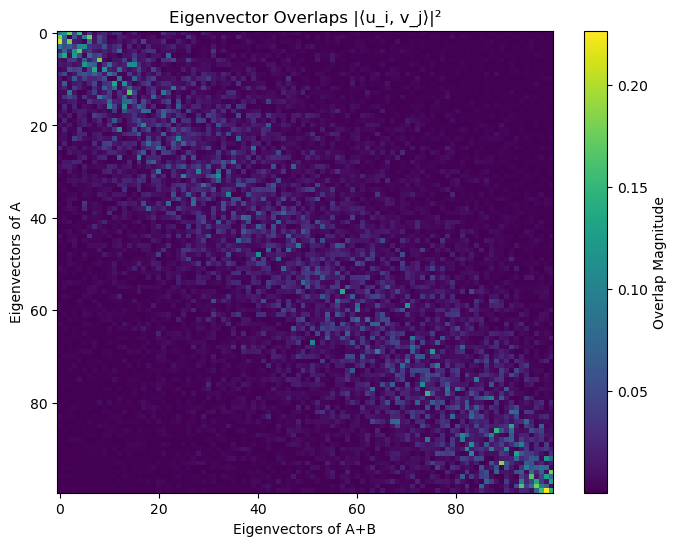

Average diagonal overlap: 0.0358


In [ ]:
N=100 
samples = 1
overlaps = []

for n in range(1):
    A = gue_matrix(N,1/N)
    _, eigvec_A = np.linalg.eigh(A)
    B = gue_matrix(N,1/N)
    _, eigvec_B = np.linalg.eigh(B+A)
    U = eigvec_B.transpose().conj() @ eigvec_A
    overlaps.append(np.abs(U)**2)

mean_overlaps = np.mean(overlaps,axis=0)

# Analyze overlaps
avg_overlap = np.mean(np.diag(mean_overlaps))  # Average diagonal overlap

# Plot the overlap matrix
plt.figure(figsize=(8, 6))
plt.imshow(mean_overlaps, cmap='viridis', aspect='auto')
plt.colorbar(label='Overlap Magnitude')
plt.title('Eigenvector Overlaps |⟨u_i, v_j⟩|²')
plt.xlabel('Eigenvectors of A+B')
plt.ylabel('Eigenvectors of A')
plt.show()

# Print average diagonal overlap
print(f"Average diagonal overlap: {avg_overlap:.4f}")

### Deutsch 1991:
Take a $H_0$ (Hamiltonian) that in some basis $|i_0\rangle$ is diagonal, for example $\langle i_0| H_0|i_0 \rangle = i/N$ with $i=1,\cdots,N$. Add a perturbation $H_1\sim \epsilon \,\text{GOE}(N)$ with variance $\langle (H_1)_{ij}^2 \rangle = \epsilon^2/N$. Then the eigenvectors of $H=H_0+H_1$ are 
$$|i\rangle = \sum_j c_{ij} |j_0\rangle $$
That is, $c_{ij}$ is the jth component of the ith eigenvector of $h_{ij} = \langle i_0| H | j_0\rangle$. In other words, it is the overlap between the two eigen-bases, $ \langle i | j_0 \rangle = c_{ij}$.
Its distribution is given by (Deutsch 1991)
$$ P(c_{ij}) = \frac{1}{\sqrt{\pi\Gamma_{ij}}}e^{-c_{ij}^2/\Gamma_{ij}}$$
with a Lorentzian
$$\Gamma_{ij} = \frac{\delta/\pi}{(i-j)^2+\delta^2}$$
and $\delta = \pi \epsilon^2 /(2N \Delta^2)$

In [318]:
N=5000
eps = 0.1
samples = 1
cs = []
vals = []
spacings = []

def prob(c,i,j,N,eps,Delta):
    delta = np.pi*eps**2/(N*2*Delta**2)
    Gamma = delta/np.pi / ((i-j)**2 + delta**2)
    return 1/np.sqrt(np.pi*Gamma)*np.exp(-c**2/Gamma)

for n in range(samples):
    # H_0 = np.diag(np.linspace(0,1,N))
    H_0 = np.diag(np.exp(np.linspace(0,1,N)))
    # H_0 = np.eye(N)
    H_1 = eps * goe_matrix(N,var=1/N)
    val, vec  = np.linalg.eigh(H_0+ H_1) # vec[:,i] is the i-th eigenvector
    idx = np.argsort(val) #sort small to big
    val = val[idx]
    vec = vec[idx]
    spacing = np.mean(np.diff(val))
    spacings.append(spacing)
    c = vec.T # c[i,j] is the j-th component of the i-th eigenvector
    cs.append(vec)
    vals.append(val)

cs = np.array(cs)
vals = np.array(val)
spacing = np.mean(spacings)

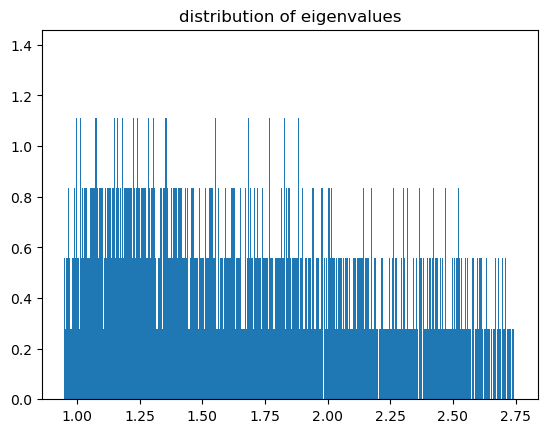

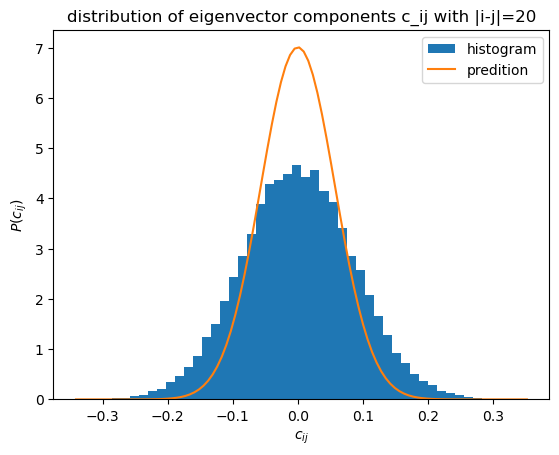

In [316]:
# show distribution eigenvalues
xlim = 3
plt.hist(vals,bins = 1000,density=True)
plt.title("distribution of eigenvalues")
plt.show()

# print("spacing", spacing)

#show distribution of eigenvectors
diff = 20
idx = np.arange(cs.shape[1] - diff)
cs_list = np.concatenate((cs[:,idx,idx+diff],cs[:,idx+diff,idx]),axis=None)
plt.hist(cs_list,bins=50,density=True,label="histogram")
x = np.linspace(np.min(cs_list),np.max(cs_list),100)
plt.title(f"distribution of eigenvector components c_ij with |i-j|={diff}")
plt.xlabel("$c_{ij}$")
plt.ylabel("$P(c_{ij})$")
plt.plot(x,prob(x,0,diff,N,eps,Delta=spacing/2),label="predition")
plt.legend()
plt.show()

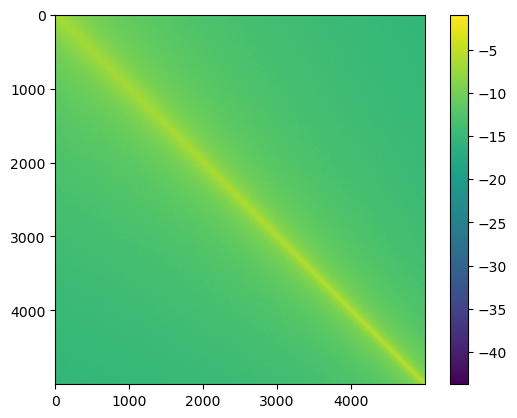

In [319]:
plt.imshow(np.log(np.mean(cs**2,axis=0)))
plt.colorbar()